In [64]:
import math
import matplotlib.pyplot as plt

In [345]:
with open('datasets/hw2dataset_100.txt', 'r') as f:
    all_text = f.read()


In [346]:
# print(all_text)

In [347]:
text = all_text.split('\n')[1:]

In [348]:
# print(text)

In [349]:
class Data:
    def __init__(self, line):
        line = line.split('\t')
        self.weight = int(line[1])
        self.height = int(line[2])
        self.missing = line[0] == '-' 
        # gamma female (prob. that gender is female)
        self.gfem = 1 if line[0] == '1' else 0
        


In [350]:
# Store data in an array of Data objects
data = []
for t in text:
    if len(t) > 4:
        data.append(Data(t))

In [383]:
prob_female = 0.95
prob_female_height = 0.1
prob_female_weight = 0.3
prob_male_height = 0.85
prob_male_weight = 0.9

In [370]:
prob_female = 0.3
prob_female_height = 0.7
prob_female_weight = 0.6
prob_male_height = 0.3
prob_male_weight = 0.2

In [396]:
# Initialization of parameters
# There are 5 parameters
prob_female = 0.5
# prob. that height = 1
prob_female_height = 0.5
# prob. that weight = 1
prob_female_weight = 0.5
# prob. that height = 1
prob_male_height = 0.5
# prob. that weight = 1
prob_male_weight = 0.5


In [397]:
def prob(x, p):
    # x is either 1 or 0
    # p is the prob. that x = 1
    return p if x == 1 else (1-p)
    

In [398]:
def log_likelihood():
    sum = 0
    for d in data:
        if d.missing:
            # marginalize joint probability for missing data
            temp = prob_female * prob(d.weight, prob_female_weight) * prob(d.height, prob_female_height)
            temp += (1-prob_female) * prob(d.weight, prob_male_weight) * prob(d.height, prob_male_height)
        else:
            # no marginalization for non missing data
            if d.gfem == 1:
                temp = prob_female * prob(d.weight, prob_female_weight) * prob(d.height, prob_female_height)
            else:
                temp = (1-prob_female) * prob(d.weight, prob_male_weight) * prob(d.height, prob_male_height)
        sum += math.log(temp)
    return sum

In [399]:
llhood = []
llhood.append(log_likelihood())

N = len(data)
for i in range(1,100):
    # E Step: P(Z/X;Theta_old)
    # Compute gamma values for each datapoint
    for d in data:
        # update the soft gender assignment for each missing value
        if d.missing:
            temp_f = prob_female * prob(d.weight, prob_female_weight) * prob(d.height, prob_female_height)
            temp_m = (1-prob_female) * prob(d.weight, prob_male_weight) * prob(d.height, prob_male_height)
            # update
            d.gfem = temp_f / (temp_f + temp_m)
        
    # M Step: Update parameters using gamma values
    # Effective number of females & males
    N_female = sum([d.gfem for d in data])
    N_male = N - N_female

    # update gender probability
    prob_female = N_female / N
    
    # update conditional parameters
    prob_female_weight = sum([d.gfem * d.weight for d in data]) / N_female
    prob_female_height = sum([d.gfem * d.height for d in data]) / N_female
    prob_male_weight = sum([(1-d.gfem) * d.weight for d in data]) / N_male
    prob_male_height = sum([(1-d.gfem) * d.height for d in data]) / N_male
        
    
    # After M-step compute log likelihood
    llhood.append(log_likelihood())
    
    if (llhood[-1] - llhood[-2]) < 0.0001:
        break

In [400]:
llhood

[-27.725887222397812, -25.16621882179052, -25.16621882179052]

In [401]:
len(llhood)

3

In [402]:
x = range(len(llhood))

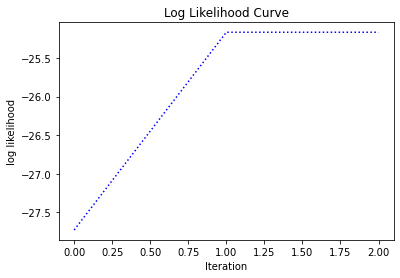

In [403]:
plt.plot(x, llhood, ':b')
plt.title("Log Likelihood Curve")
plt.xlabel("Iteration")
plt.ylabel("log likelihood");

In [404]:
prob_female

0.5

In [392]:
prob_female_height

0.2746209939369473

In [393]:
prob_female_weight

0.2271276357149236

In [394]:
prob_male_height

0.962207649170037

In [395]:
prob_male_weight

0.8918493909446281